## Introduccion
Este Notebook tiene como objetivo mostrar la implementacion de un modelo de deteccion de patentes.
Como entrada recibira un conjunto de imagenes de vehiculos las cuales seran analizadas por el modelo buscando la patente del vehiculo para hacerle un recorte, obteniendo una nueva imagen la cual contendra solo la patente del vehiculo.
Luego, en otro notebook se explicará como se realiza el reconocimiento de los caracteres.

Montaje de unidad Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Entrenamiento del modelo

Instalacion de dependencias

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/201.2 GB disk)


Entrenamiento con el dataset de patentes

In [ ]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

ruta_yaml = "/content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/data.yaml"

# Crear y entrenar el modelo
model = YOLO('yolov8n.pt')
resulto_train = model.train(data=ruta_yaml, epochs=30, imgsz=480, plots=True)

100%|██████████| 6.23M/6.23M [00:00<00:00, 316MB/s]
New https://pypi.org/project/ultralytics/8.2.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/data.yaml, epochs=40, patience=50, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

Muestro las metricas de entrenamiento


In [ ]:
# Asumimos que 'result_train' es tu objeto DetMetrics
print("Métricas de Entrenamiento:")

# Accede directamente a los atributos del objeto
print(f"Precision: {resulto_train.results_dict['metrics/precision(B)']}")
print(f"Recall: {resulto_train.results_dict['metrics/recall(B)']}")
print(f"mAP50: {resulto_train.results_dict['metrics/mAP50(B)']}")
print(f"mAP50-95: {resulto_train.results_dict['metrics/mAP50-95(B)']}")
print(f"Fitness: {resulto_train.fitness}")

Métricas de Entrenamiento:
Precision: 0.9919772176652911
Recall: 1.0
mAP50: 0.995
mAP50-95: 0.6473682844444445
Fitness: 0.6821314560000001


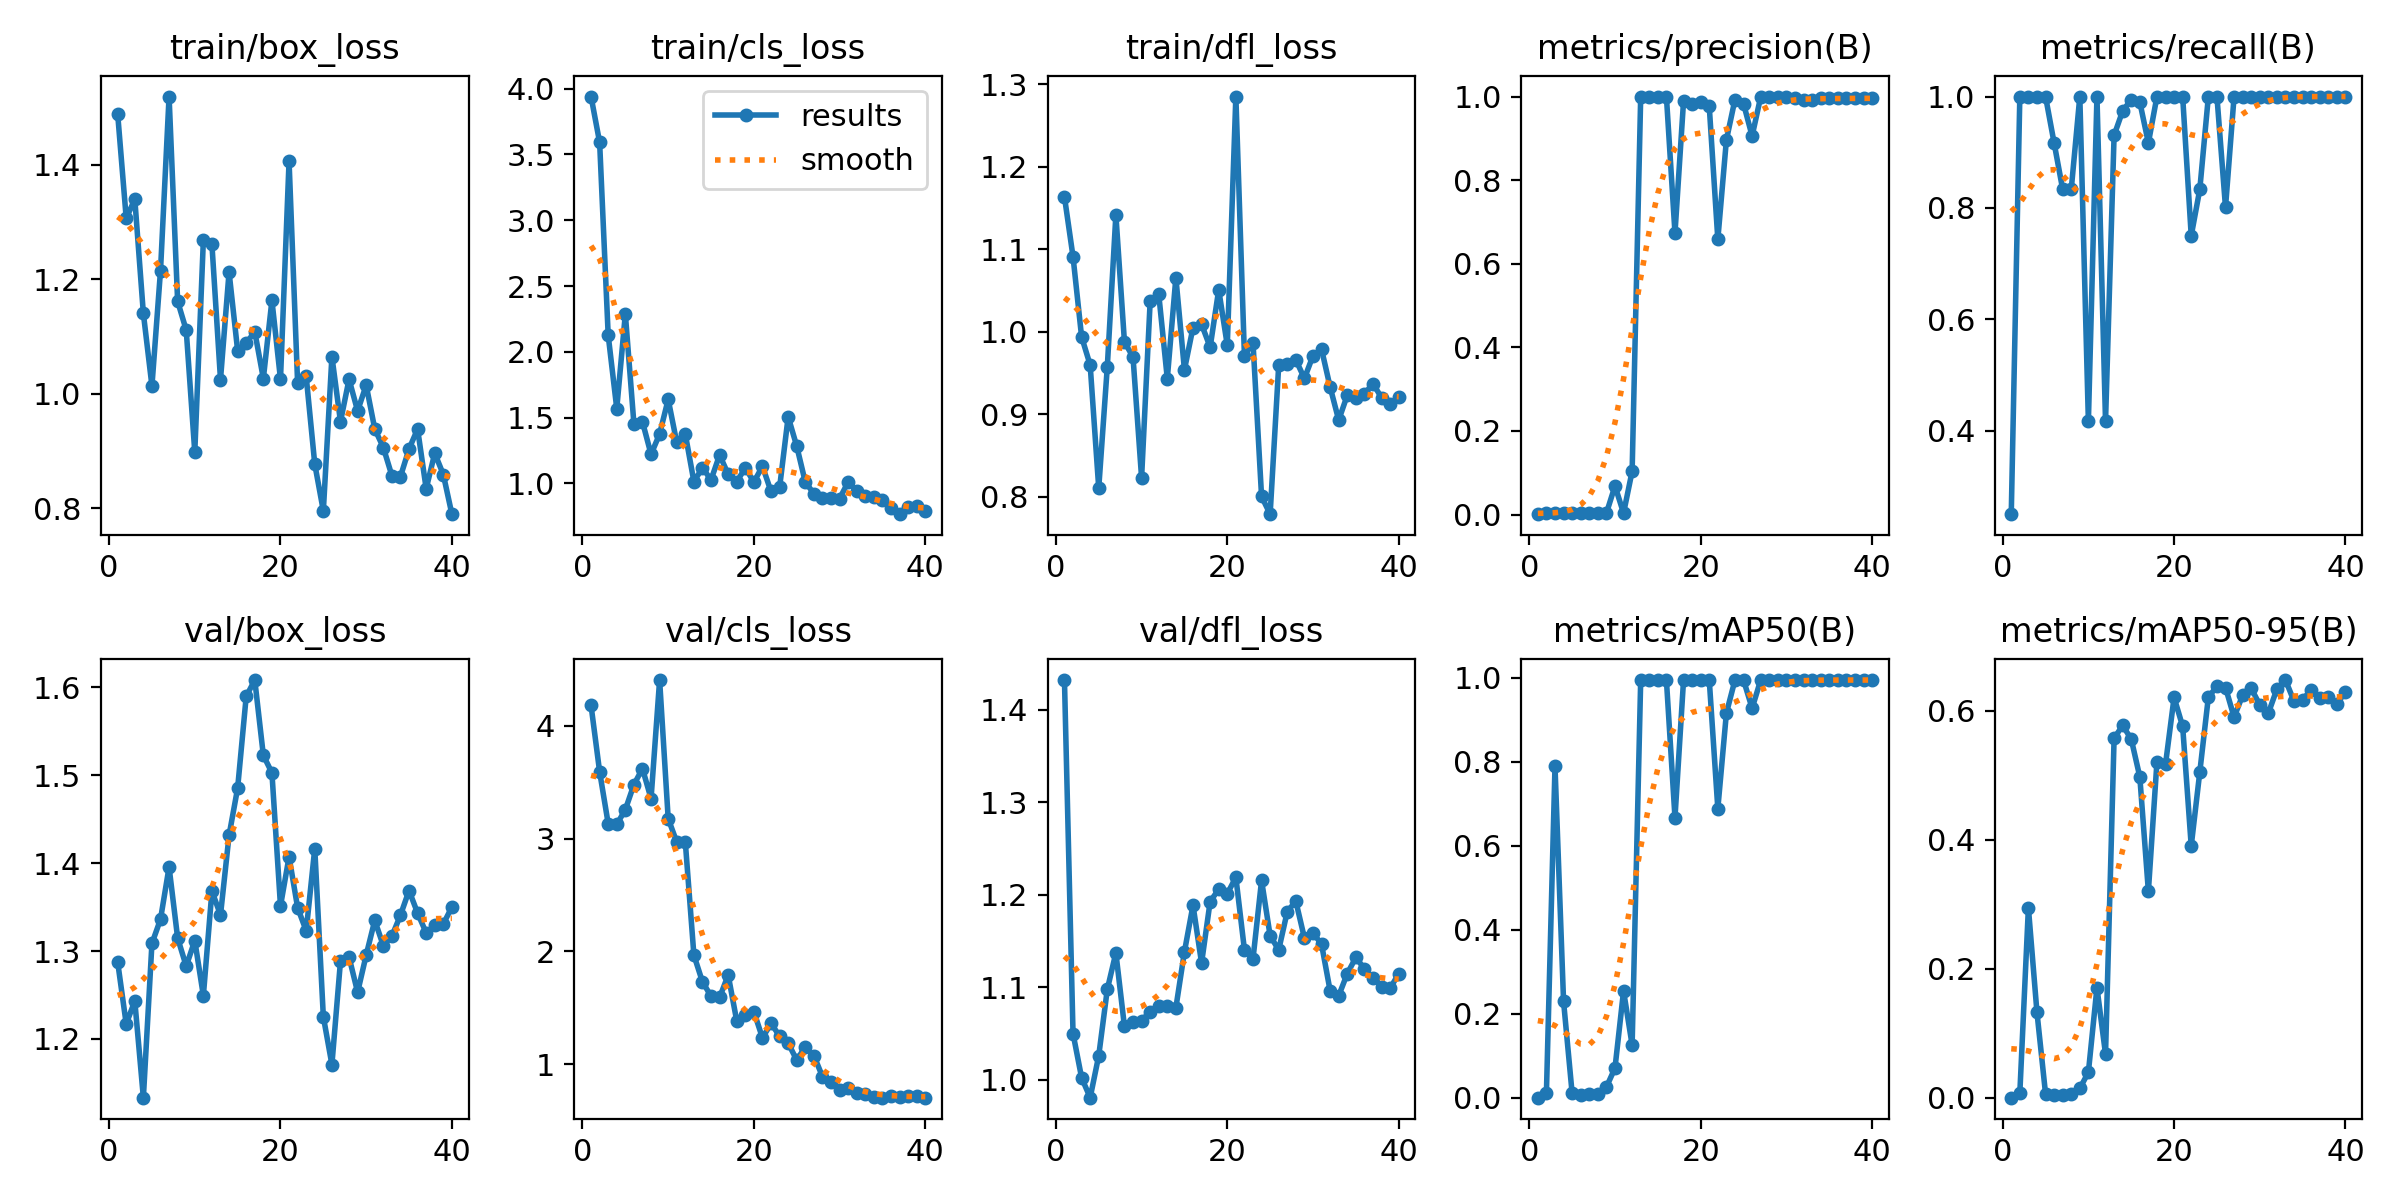

In [ ]:
Image(filename=f'runs/detect/train/results.png', width=900)

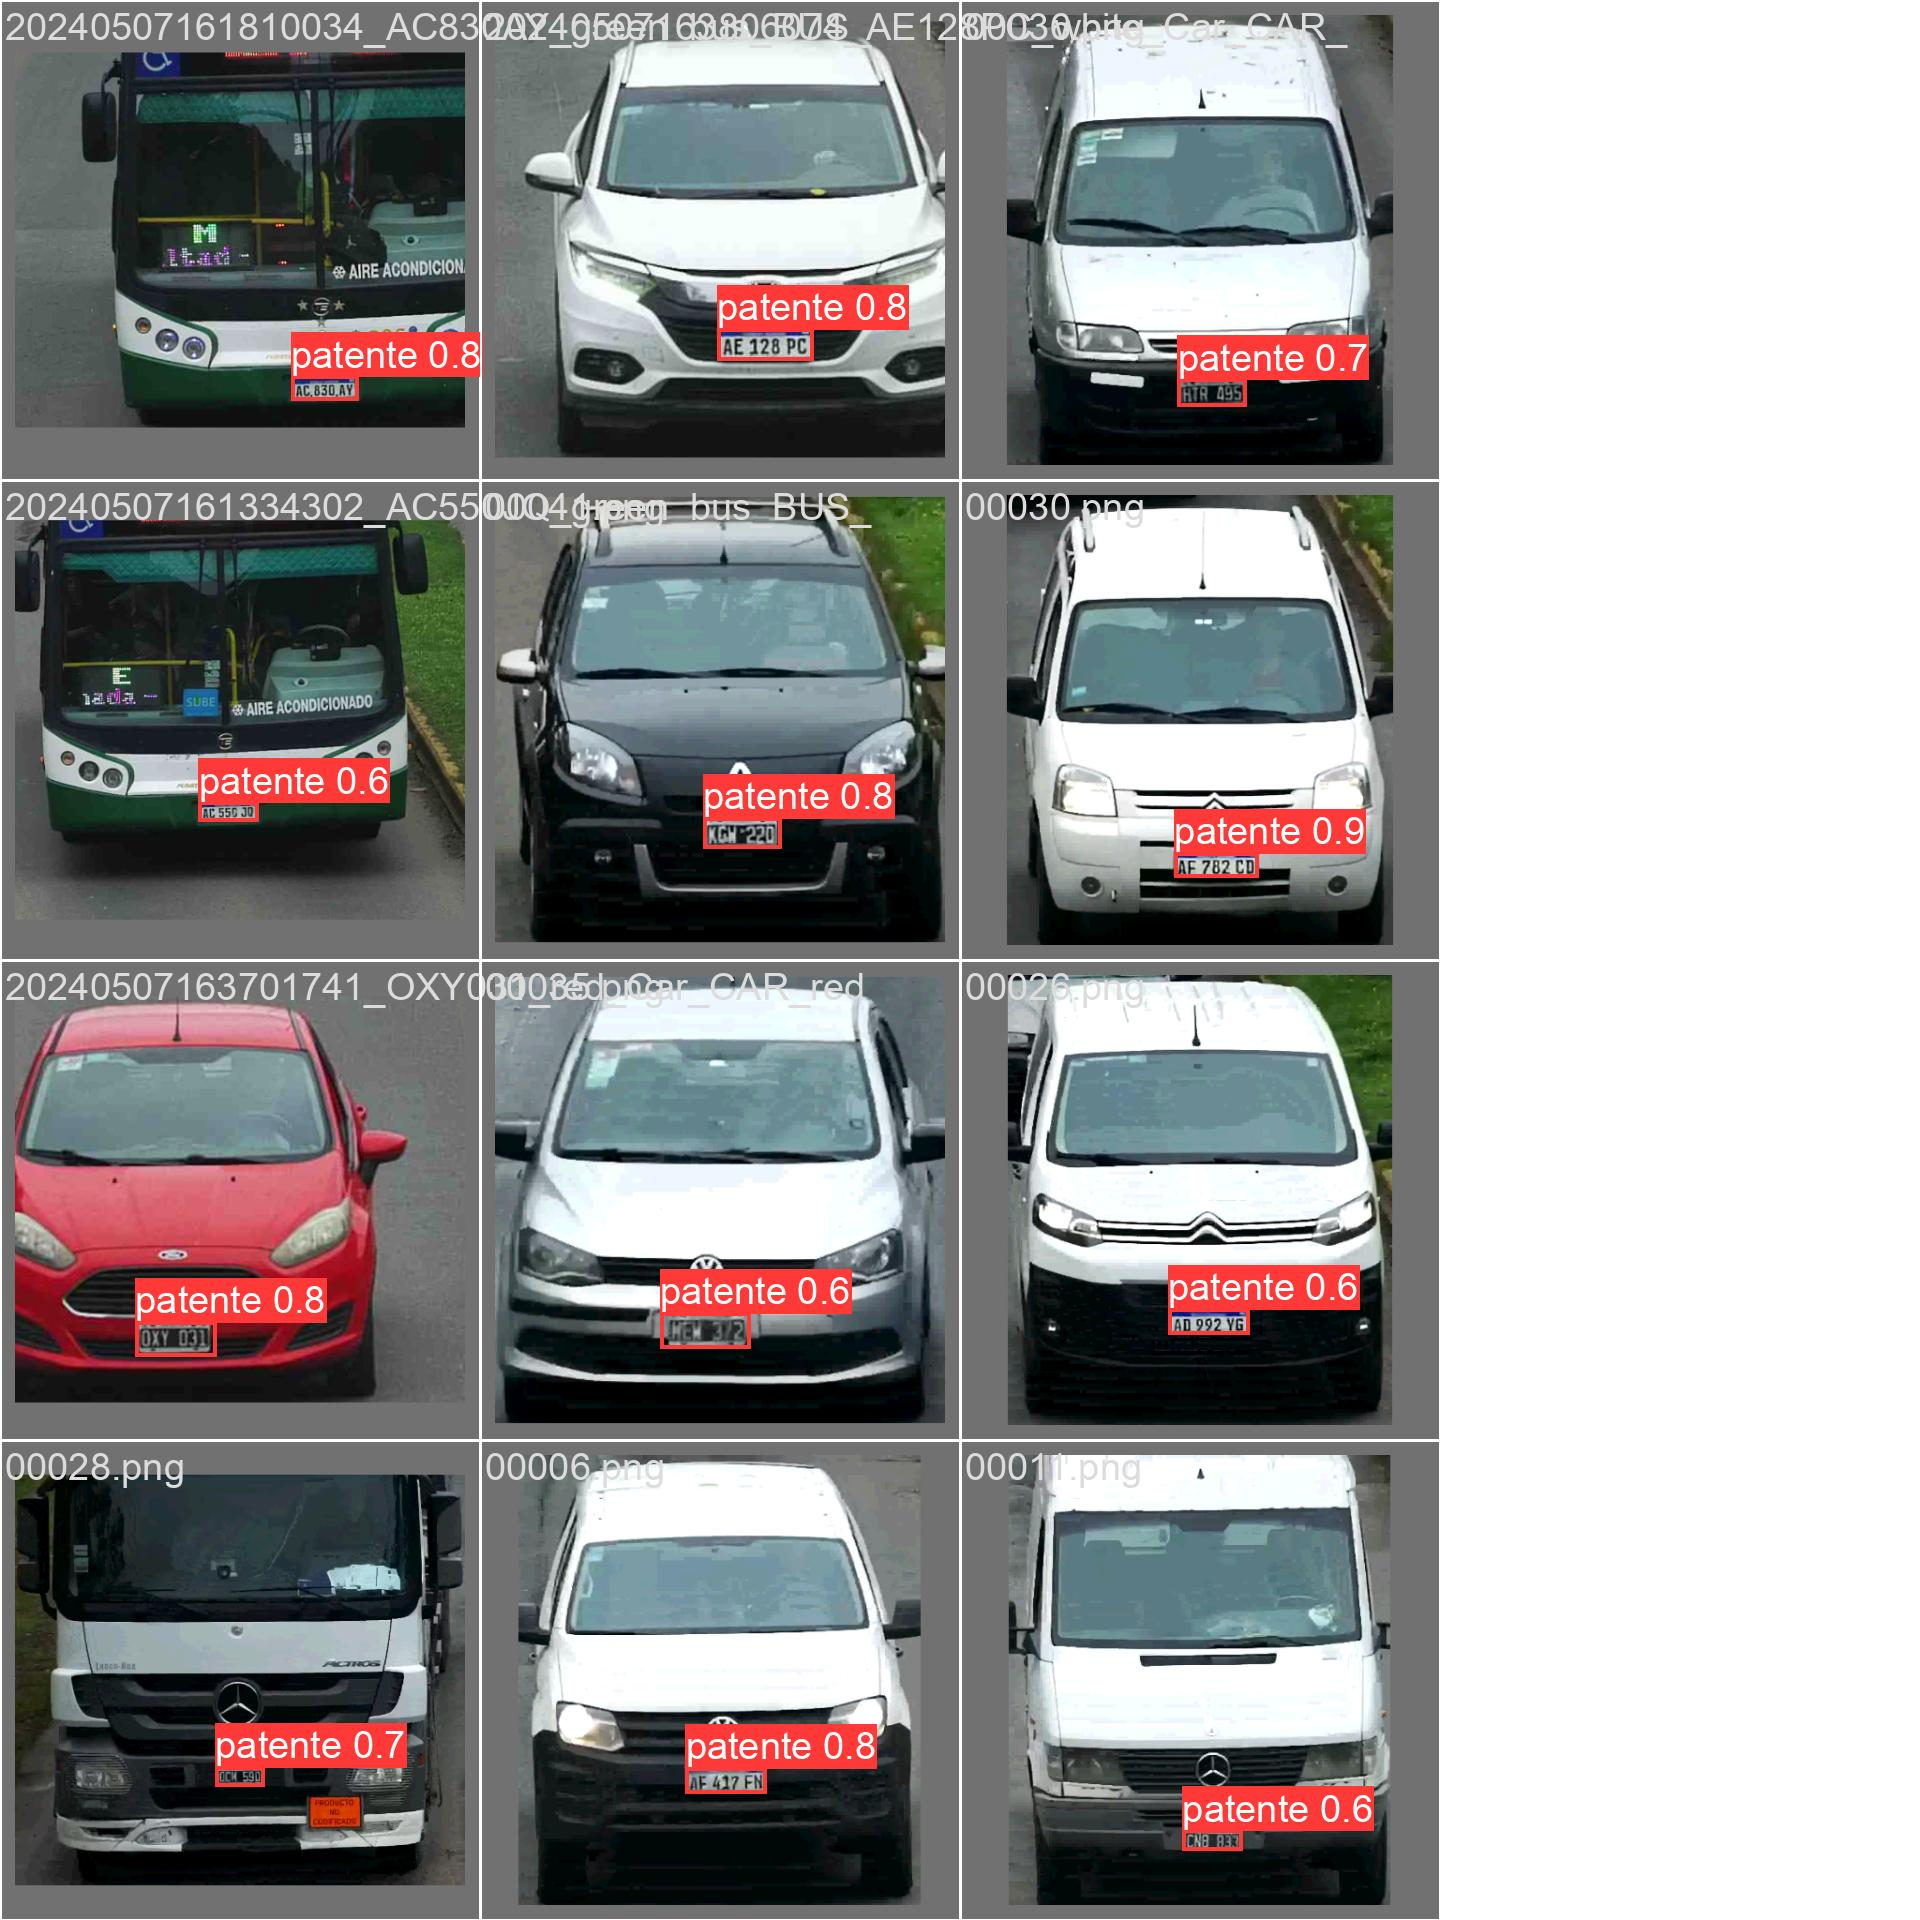

In [ ]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=900)

## Testeo del modelo


In [ ]:

# Definir la ruta al directorio de test desde el archivo YAML
test_dir = "/content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images"
predict_save_dir = "/content/runs/detect/predict"

In [ ]:
# Realizar predicciones
result_test = model.predict(source=test_dir, save=True)



image 1/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00004.png: 480x480 1 patente, 7.6ms
image 2/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00007.png: 480x480 1 patente, 6.2ms
image 3/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00010.png: 480x480 1 patente, 7.2ms
image 4/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00014.png: 480x448 1 patente, 6.9ms
image 5/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00016.png: 480x480 1 patente, 7.0ms
image 6/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00022.png: 448x480 1 patente, 6.9ms
image 7/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00023.png: 448x480 1 patente, 6.5ms
image 8/23 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00024.png: 480x480 1 patente, 7.4ms
image 9/23 /content/dri

In [ ]:
print("Resultados de Predicción:")

for i, result in enumerate(result_test):
    print(f"Resultado para la imagen {i+1}:")
    # Accede a los atributos del resultado individual
    print(f"  Nombre de archivo: {result.path}")
    print(f"  Número de predicciones: {len(result.boxes)}")

    for box in result.boxes:
        # Convierte el tensor a un valor escalar antes de usarlo como índice
        clase_idx = int(box.cls.item())
        print(f"    Clase: {result.names[clase_idx]}")
        print(f"    Confianza: {box.conf.item()}")
        print(f"    Coordenadas: {box.xyxy.tolist()}")  # Convierte las coordenadas a una lista


Resultados de Predicción:
Resultado para la imagen 1:
  Nombre de archivo: /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00004.png
  Número de predicciones: 1
    Clase: patente
    Confianza: 0.8141129016876221
    Coordenadas: [[189.99586486816406, 293.6472473144531, 270.59283447265625, 329.1559753417969]]
Resultado para la imagen 2:
  Nombre de archivo: /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00007.png
  Número de predicciones: 1
    Clase: patente
    Confianza: 0.8711322546005249
    Coordenadas: [[189.01174926757812, 318.34564208984375, 286.5373229980469, 349.9320983886719]]
Resultado para la imagen 3:
  Nombre de archivo: /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/patentes_dataset/test/images/00010.png
  Número de predicciones: 1
    Clase: patente
    Confianza: 0.7037563920021057
    Coordenadas: [[159.4922332763672, 283.5623474121094, 235.8191680908203, 313.815185546875]]
Resultado para la imagen 4:
  Nombre d

In [ ]:
from collections import defaultdict

# Inicializar acumuladores para las métricas por clase y generales
class_metrics = defaultdict(lambda: {"confidences": [], "count": 0})
global_metrics = {"confidences": [], "count": 0}

# Iterar sobre los resultados de predicción
for result in result_test:
    for box in result.boxes:
        clase_idx = int(box.cls.item())
        class_name = result.names[clase_idx]
        confidence = box.conf.item()

        # Actualizar métricas por clase
        class_metrics[class_name]["confidences"].append(confidence)
        class_metrics[class_name]["count"] += 1

        # Actualizar métricas generales
        global_metrics["confidences"].append(confidence)
        global_metrics["count"] += 1

# Calcular métricas generales para cada clase
print("Métricas Generales por Clase:")
for class_name, metrics in class_metrics.items():
    confidences = metrics["confidences"]
    count = metrics["count"]

    avg_confidence = sum(confidences) / len(confidences) if confidences else 0

    print(f"Clase: {class_name}")
    print(f"  Número de Predicciones: {count}")
    print(f"  Confianza Promedio: {avg_confidence:.2f}")


Métricas Generales por Clase:
Clase: patente
  Número de Predicciones: 23
  Confianza Promedio: 0.75


Muestro las detecciones de las patentes


<ipython-input-25-5d711128beee>:23: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((target_width, target_height), Image.ANTIALIAS)


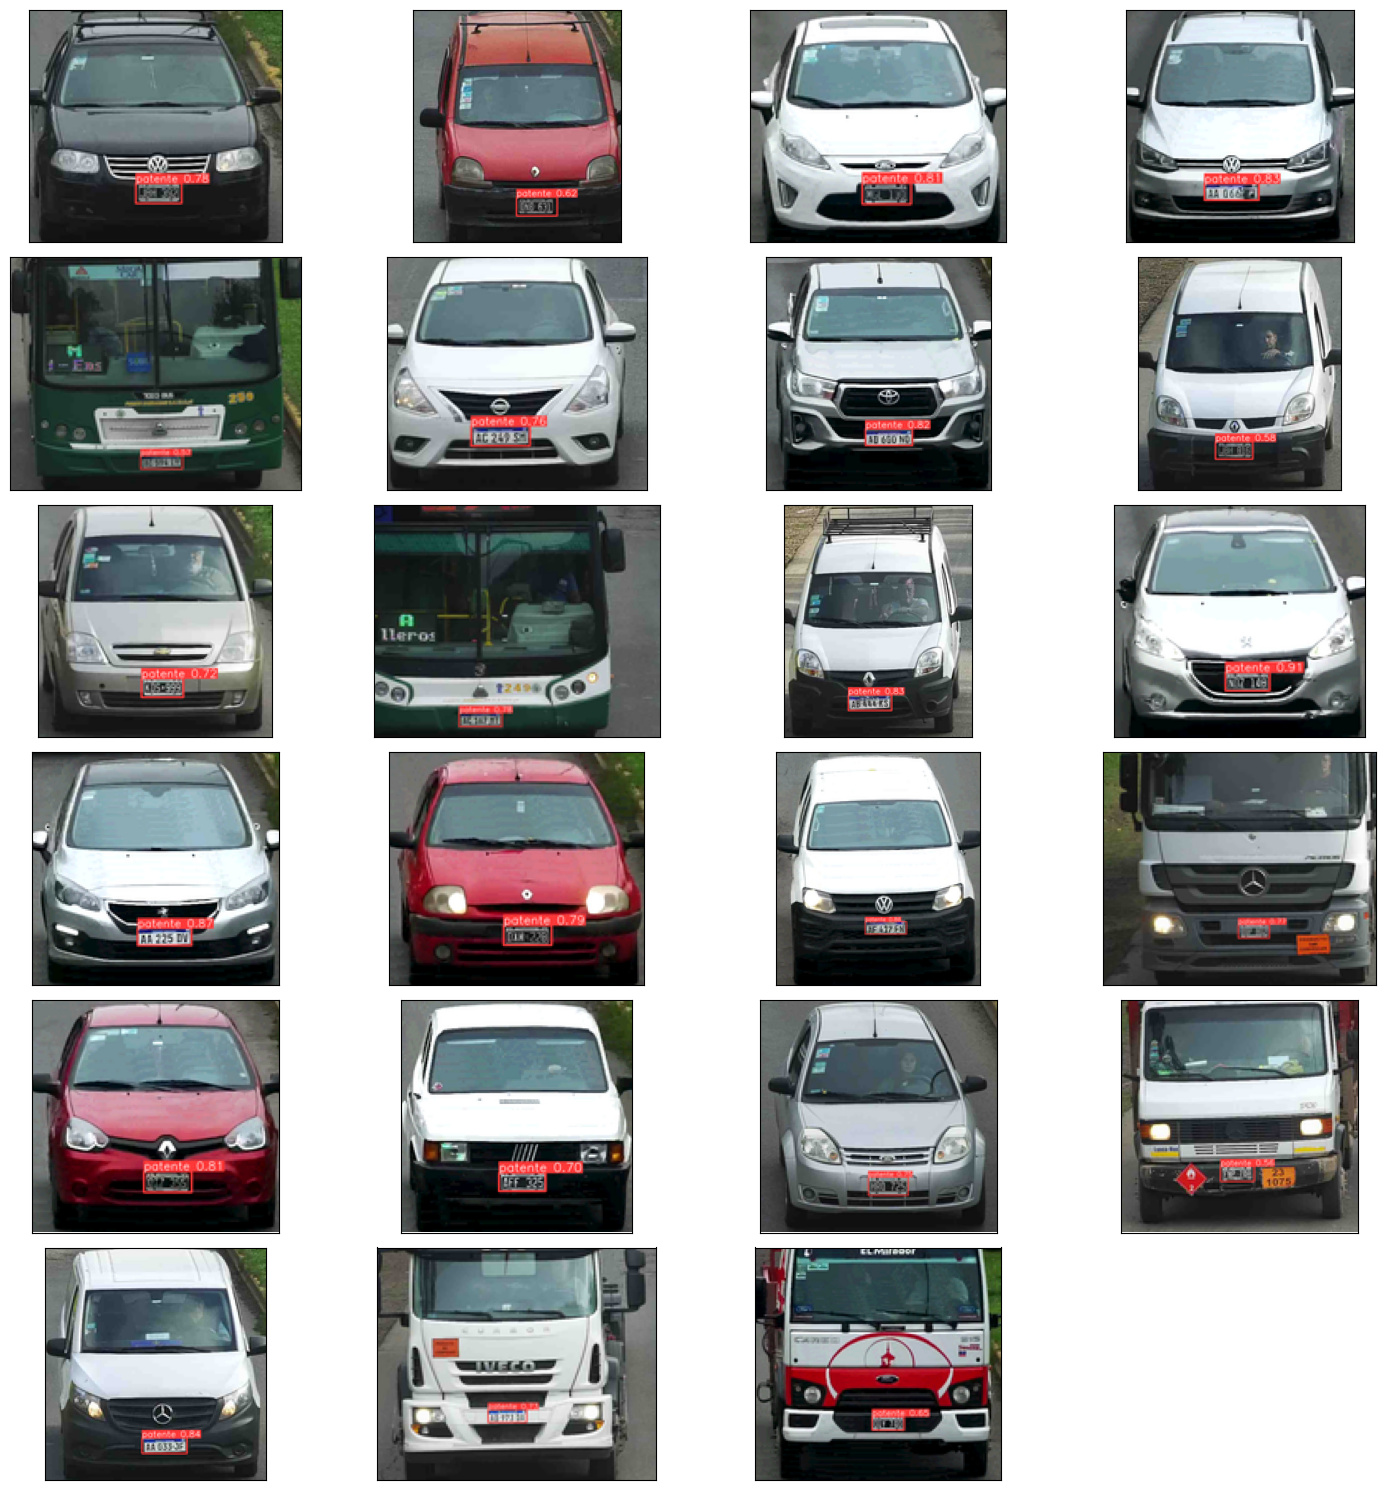

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

# Directorio donde se encuentran las imágenes
image_dir = 'runs/detect/predict2'

# Obtener la lista de todas las imágenes en el directorio
image_paths = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Definir el número de columnas
columns = 4

# Definir el ancho deseado para todas las imágenes
target_width = 150

# Redimensionar las imágenes manteniendo la proporción
resized_images = []
for img_path in image_paths:
    img = Image.open(img_path)
    w_percent = (target_width / float(img.size[0]))
    target_height = int((float(img.size[1]) * float(w_percent)))
    img = img.resize((target_width, target_height), Image.ANTIALIAS)
    resized_images.append(img)

# Número de filas necesarias
rows = (len(resized_images) + columns - 1) // columns

# Crear la figura
plt.figure(figsize=(15, 15))

# Loop para mostrar las imágenes
for i, img in enumerate(resized_images):
    plt.subplot(rows, columns, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)

# Mostrar la figura
plt.tight_layout()
plt.show()


Una vez predichas todas las ubicaciones de las patentes en cada imagen, se realizan los recortes para obtener nuevas imagenes a partir de las patentes detectadas

Ahora que ya tenemos el modelo entrenado y testeado pasamos a leer todos los recortes de vehiculos que obtuvimos en el 1er notebook

In [ ]:
# Definir la ruta al directorio de test desde el archivo YAML
vehiculos_dir = "/content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/vehiculos_recortes"

In [ ]:
result_prediccion = model.predict(source=vehiculos_dir, save=True)


image 1/147 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/vehiculos_recortes/20240507121443045_GKL892_white_Car_camioneta_1.jpg: 480x480 1 patente, 8.4ms
image 2/147 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/vehiculos_recortes/20240507121450434_AG170KO_blue_truck_camion_1.jpg: 384x480 1 patente, 153.6ms
image 3/147 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/vehiculos_recortes/20240507121619486_OWV963_white_van_camioneta_1.jpg: 480x448 1 patente, 10.3ms
image 4/147 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/vehiculos_recortes/20240507121800673_unknown_black_Motorcycle_moto_1.jpg: 480x288 (no detections), 75.3ms
image 5/147 /content/drive/MyDrive/IA-ANALISIS-DE-TRAFICO/vehiculos_recortes/20240507122027825_unknown_red_Motorcycle_moto_1.jpg: 480x288 (no detections), 7.5ms
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN

In [ ]:
import os
import cv2
from collections import defaultdict

# Crear la carpeta 'patentes' si no existe
output_dir = 'patentes'
os.makedirs(output_dir, exist_ok=True)

# Lista para almacenar los objetos detectados
detected_objects = []

# Contador para asegurar nombres únicos
image_count = defaultdict(int)

# Procesar los resultados y extraer los objetos detectados
for result in result_prediccion:
    img = cv2.imread(result.path)
    base_name = os.path.basename(result.path)
    name, ext = os.path.splitext(base_name)

    for box in result.boxes:
        # Asegurarse de que box.xyxy es un tensor y convertirlo a una lista
        xyxy = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = map(int, xyxy)
        cropped_img = img[y1:y2, x1:x2]  # Recortar el objeto de la imagen

        # Añadir el recorte a la lista detected_objects
        detected_objects.append(cropped_img)

        # Generar el nuevo nombre de archivo
        image_count[name] += 1
        new_name = f"{name}_patente_{image_count[name]}{ext}"
        new_path = os.path.join(output_dir, new_name)

        # Guardar la imagen recortada
        cv2.imwrite(new_path, cropped_img)
        print(f"Guardado: {new_path}")



Guardado: patentes/20240507121443045_GKL892_white_Car_camioneta_1_patente_1.jpg
Guardado: patentes/20240507121450434_AG170KO_blue_truck_camion_1_patente_1.jpg
Guardado: patentes/20240507121619486_OWV963_white_van_camioneta_1_patente_1.jpg
Guardado: patentes/20240507123917051_LUU421_white_truck_camion_1_patente_1.jpg
Guardado: patentes/20240507124130635_AD646IS_white_van_camioneta_1_patente_1.jpg
Guardado: patentes/20240507124130635_AD646IS_white_van_camioneta_1_patente_2.jpg
Guardado: patentes/20240507124629264_ILI053_grey_Car_auto_1_patente_1.jpg
Guardado: patentes/20240507125133842_AC138BN_grey_van_camioneta_1_patente_1.jpg
Guardado: patentes/20240507125603865_OME230_white_van_camioneta_1_patente_1.jpg
Guardado: patentes/20240507125652637_AG042JL_white_van_auto_1_patente_1.jpg
Guardado: patentes/20240507125652637_AG042JL_white_van_camioneta_1_patente_1.jpg
Guardado: patentes/20240507130131851_LAS986_grey_Car_auto_1_patente_1.jpg
Guardado: patentes/20240507130131851_LAS986_grey_Car_au

Muestro las patentes detectadas

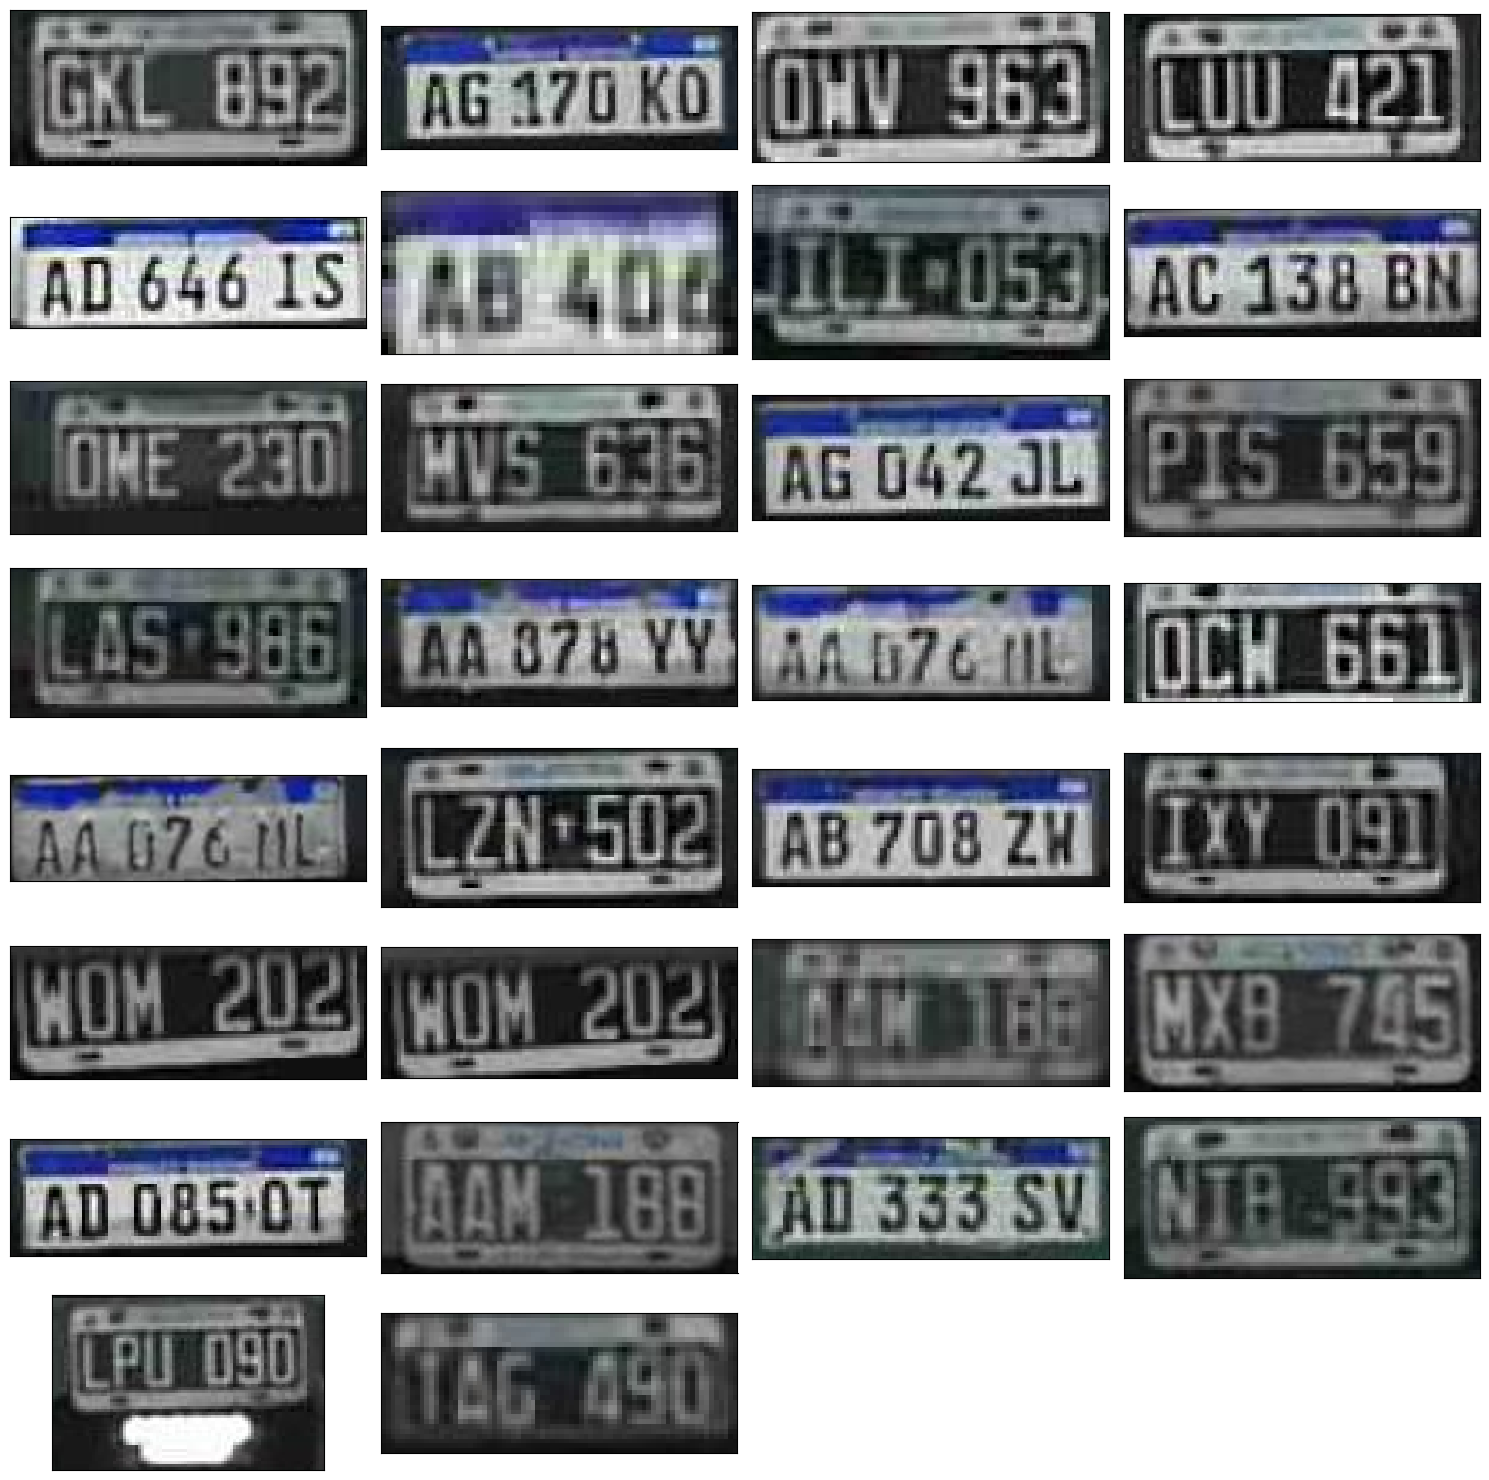

In [ ]:
# Definir el número de columnas
columns = 4
detected_objects_muestra = detected_objects[:30]

# Número de filas necesarias
rows = (len(detected_objects_muestra) + columns - 1) // columns

# Crear la figura
plt.figure(figsize=(15, 15))

# Loop para mostrar los objetos detectados
for i, obj in enumerate(detected_objects_muestra):
    plt.subplot(rows, columns, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if obj is not None:
        obj = cv2.cvtColor(obj, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
        plt.imshow(obj)

# Mostrar la figura
plt.tight_layout()
plt.show()

Con esto guardamos todos los recortes de patentes en la carpeta "patentes"
